# Valuation Visualization Analysis

---


## Using Financial Modeling Prep API

https://financialmodelingprep.com/developer/docs/

In [86]:
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from pathlib import Path
import os
import time
import json
import datetime
import plotly.express as px

# Additional PyViz imports
import hvplot.pandas
#import matplotlib.pyplot as plt
%matplotlib inline

#### User sets their unique .env path and ticker_path

In [87]:
# David Load .env, api_key, and ticker_path

#David
env_path = Path(r'C:\Users\david\Dropbox\Learning\Northwestern\Project1\.env')

load_dotenv(env_path)
api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# Set file variable for csv of tickers symbols
ticker_path = Path('Resources/dow_tickers.csv')

# Confirm if load_dotenv worked. Remove this later!
load_dotenv()

True

In [ ]:
# # Marshall Load .env, api_key, and ticker_path

# #Marshall
# env_path = Path('/Users/marshallwolfe/Desktop') / '.env'

# load_dotenv(env_path)
# api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# # Set file variable for csv of tickers symbols
# ticker_path = Path('Resources/dow_tickers.csv')

# # Confirm if load_dotenv worked. Remove this later!
# load_dotenv()

In [ ]:
# # Amrita Load .env, api_key, and ticker_path

# #Amrita
# env_path = Path(r'C:\Python\.env')

# load_dotenv(env_path)
# api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# # Set file variable for csv of tickers symbols
# ticker_path = Path(r'C:\Users\amrita.kumari\ValuationVisualization\ValuationVisualization\dow_tickers.csv')

# # Confirm if load_dotenv worked. Remove this later!
# load_dotenv()

#### User sets Pandas DataFrame formatting options

In [88]:
# Pandas DataFrame formatting to see decimals
pd.options.display.float_format = "{:.2f}".format

#### User pulls data from API

In [39]:
# Tickers DOW, DIS, WBA have incomplete data for the last 10 years

tickers_df = pd.read_csv(ticker_path, header=None)
tickers = list(tickers_df[0].values)
dow_is_df = pd.DataFrame()
date_list = []
ticker_list = []
price_list = []
revenue_list = []
eps_list = []
pe_list = []
shares_outstanding_list = []
mkt_cap_list= []

for ticker_name in tickers:

    for year in range(11,-1,-1):

        url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker_name}?apikey={api_key}"
        requests.get(url).content
        parsed = json.loads(requests.get(url).content)
        
        url2 = f"https://financialmodelingprep.com/api/v3/enterprise-values/{ticker_name}?apikey={api_key}"
        requests.get(url2).content
        parsed2 = json.loads(requests.get(url2).content)
        
        url3 = f"https://financialmodelingprep.com/api/v3/ratios/{ticker_name}?apikey={api_key}"
        requests.get(url3).content
        parsed3 = json.loads(requests.get(url3).content)

        try:
            date_list.append(parsed[year]['date'])
        except:
            date_list.append(np.nan)
            
        ticker_list.append(ticker_name)
        
        try:
            price_list.append(parsed2[year]['stockPrice'])
        except:
            price_list.append(np.nan)
        
        try:
            revenue_list.append(parsed[year]['revenue'])
        except:
            revenue_list.append(np.nan)
    
        try:
            eps_list.append(parsed[year]['eps'])
        except:
            eps_list.append(np.nan)
            
        try:
            pe_list.append(parsed3[year]['priceEarningsRatio'])
        except:
            pe_list.append(np.nan)

        try:
            shares_outstanding_list.append(parsed[year]['weightedAverageShsOut'])
        except:
            shares_outstanding_list.append(np.nan)
            
        try:
            mkt_cap_list.append(parsed2[year]['marketCapitalization'])
        except:
            mkt_cap_list.append(np.nan)
    
dict1 = {'Date': date_list, 'Ticker': ticker_list, 'Stock Price': price_list, 'Revenue': revenue_list, 'EPS': eps_list, 'PE': pe_list, 'Shares Outstanding': shares_outstanding_list,'Market Cap':mkt_cap_list}

dow_is_df = pd.DataFrame(dict1)

In [5]:
# Export csv of API data
dow_is_df.to_csv('Resources/output2008raw.csv')

NameError: name 'dow_is_df' is not defined

#### Load CSV of API data to speed analysis

In [89]:
# Read file path of csv of API data
csv_of_API_path = Path('Resources/output2008raw.csv')

In [90]:
# Read csv of API data into DataFrame
csv_of_API = pd.read_csv(csv_of_API_path)
csv_of_API.drop(columns=["Unnamed: 0"], inplace=True)
csv_of_API.head()

Date Ticker  Stock Price        Revenue  EPS    PE  \
0  2008-12-31    MMM        53.79 25269000000.00 4.95 10.87   
1  2009-12-31    MMM        80.49 23123000000.00 2.04 17.37   
2  2010-12-31    MMM        87.44 26662000000.00 5.72 15.28   
3  2011-12-31    MMM        87.34 29611000000.00 6.05 14.45   
4  2012-12-31    MMM       100.80 29904000000.00 6.40 15.74   

   Shares Outstanding     Market Cap  
0        699000000.00 37599210000.00  
1        700500000.00 56343000000.00  
2        713700000.00 62405928000.00  
3        708500000.00 61880390000.00  
4        693900000.00 69945120000.00

In [91]:
# Show all rows
pd.set_option('display.max_rows',600)
df_copy = csv_of_API
df_copy

Date Ticker  Stock Price         Revenue   EPS      PE  \
0    2008-12-31    MMM        53.79  25269000000.00  4.95   10.87   
1    2009-12-31    MMM        80.49  23123000000.00  2.04   17.37   
2    2010-12-31    MMM        87.44  26662000000.00  5.72   15.28   
3    2011-12-31    MMM        87.34  29611000000.00  6.05   14.45   
4    2012-12-31    MMM       100.80  29904000000.00  6.40   15.74   
5    2013-12-31    MMM       128.05  30871000000.00  6.83   18.74   
6    2014-12-31    MMM       162.30  31821000000.00  7.63   21.26   
7    2015-12-31    MMM       151.00  30274000000.00  7.72   19.55   
8    2016-12-31    MMM       175.42  30109000000.00  8.35   21.01   
9    2017-12-31    MMM       251.54  31657000000.00  8.13   30.94   
10   2018-12-31    MMM       199.27  32765000000.00  9.09   21.92   
11   2019-12-31    MMM       162.51  32136000000.00  7.92   20.52   
12   2008-12-31    AXP        16.73            0.00  0.00     nan   
13   2009-12-31    AXP        37.66            0.00  0.00     nan   
14   2010-12-31    AXP        43.86   4869000000.00  3.37   12.84   
15   2011-12-31    AXP        49.12   4641000000.00  4.14   11.73   
16   2012-12-31    AXP        59.33   4628000000.00  3.91   15.02   
17   2013-12-31    AXP        86.62   5047000000.00  4.91   17.49   
18   2014-12-31    AXP        80.69   5472000000.00  5.56   14.33   
19   2015-12-31    AXP        53.50   5922000000.00  5.05   10.35   
20   2016-12-31    AXP        77.28   5771000000.00  5.65   13.33   
21   2017-12-31    AXP        98.71  33471000000.00  2.97   31.86   
22   2018-12-31    AXP       102.67  40338000000.00  7.91   12.70   
23   2019-12-31    AXP       133.22  43556000000.00  7.99   16.32   
24   2008-09-27   AAPL        13.16  32479000000.00  5.48    2.40   
25   2009-09-26   AAPL        28.93  36537000000.00  6.39    4.53   
26   2010-09-25   AAPL        44.12  65225000000.00 15.41    2.86   
27   2011-09-24   AAPL        57.97 108249000000.00 28.05    2.07   
28   2012-09-29   AAPL        86.29 156508000000.00 44.64    1.93   
29   2013-09-28   AAPL        75.70 170910000000.00 40.03    1.89   
30   2014-09-27   AAPL       105.11 182795000000.00  6.49   16.19   
31   2015-09-26   AAPL       115.28 233715000000.00  9.28   12.42   
32   2016-09-24   AAPL       117.65 215639000000.00  8.35   14.09   
33   2017-09-30   AAPL       166.72 229234000000.00  9.27   17.99   
34   2018-09-29   AAPL       212.24 265595000000.00 12.01   17.67   
35   2019-09-28   AAPL       249.05 260174000000.00 11.97   20.81   
36   2008-12-31     BA        42.31  60909000000.00  3.68    5.82   
37   2009-12-31     BA        60.60  68281000000.00  1.86   20.87   
38   2010-12-31     BA        69.23  64306000000.00  4.49    8.92   
39   2011-12-31     BA        74.16  68735000000.00  5.39    8.15   
40   2012-12-31     BA        74.59  81698000000.00  5.15    0.02   
41   2013-12-31     BA       126.53  86623000000.00  6.03   12.19   
42   2014-12-31     BA       145.37  90762000000.00  7.47   11.98   
43   2015-12-31     BA       120.13  96114000000.00  7.52    9.03   
44   2016-12-31     BA       165.57  94571000000.00  7.70   16.86   
45   2017-12-31     BA       337.71  93392000000.00 13.60   17.10   
46   2018-12-31     BA       387.72 101127000000.00 18.05   17.62   
47   2019-12-31     BA       323.30  76559000000.00 -1.12  -47.09   
48   2008-12-31    CAT        30.85  51324000000.00  5.83     nan   
49   2009-12-31    CAT        52.24  32396000000.00  1.45     nan   
50   2010-12-31    CAT        95.68  42588000000.00  4.28   22.38   
51   2011-12-31    CAT       110.41  60138000000.00  7.64   14.45   
52   2012-12-31    CAT        98.65  65875000000.00  8.71   11.33   
53   2013-12-31    CAT        93.20  55656000000.00  5.87   15.87   
54   2014-12-31    CAT        79.97  55184000000.00  5.99   13.36   
55   2015-12-31    CAT        62.24  47011000000.00  3.54   17.60   
56   2016-12-31    CAT        96.79  38537000000.00 -0.11 -844.10   
57   2017

#### First Derivative Function:

In [92]:
def first_der(dataframe,column_name):

    out_df = dataframe.copy(deep=True)
    
    new_column_name = f'{column_name} 1st Der'

    out_df[new_column_name] = out_df[column_name].pct_change()

    tlist = []
    dran = len(out_df)

    for i in range(dran):
    
        if out_df['Ticker'][i] not in tlist:
            tlist.append(out_df['Ticker'][i])
            out_df[new_column_name][i] = np.nan
    
    return out_df

#### Second Derivative Function:

In [93]:
def second_der(dataframe,column_name):
    
    # first_der(df_copy,column_name2)
    
    out_df = dataframe.copy(deep=True)
    
    new_column_name = column_name + ' 2nd Der'
    old_column_name = column_name + ' 1st Der'

    out_df[new_column_name] = out_df[column_name].pct_change()
    
    # df_c2 = out_df
    out_df[new_column_name] = out_df[old_column_name].pct_change()
    # out_df
    
    tlist2 = []
    dran2 = len(out_df)

    for i in range(dran2):
        if out_df['Ticker'][i] not in tlist2:
            tlist2.append(out_df['Ticker'][i])
            out_df[new_column_name][i] = np.nan
            out_df[new_column_name][i+1] = np.nan
    # df_c2
    
    dran3 = len(out_df)-1

    for i in range(dran3):
        x1 = out_df[old_column_name][i]
        # print(f'x1 = {x1}')
        x2 = out_df[old_column_name][i+1]
        # print(f'x2 = {x2}')   

        if pd.isnull(x1) or pd.isnull(x2):
            continue
        else:
            if (x1*x2)<0:
                # print(x1*x2)
                out_df[new_column_name][i+1] = np.nan
    return out_df

#### Select metrics and run first and second derivative functions on each metric:

In [94]:
# Define metric list and run first and second derivative functions on each metric
metric_list = ['Stock Price','Revenue','EPS','PE']

for metric in metric_list:
    df_copy=first_der(df_copy,metric)
    df_copy=second_der(df_copy,metric)
    
df_copy

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarni

Date Ticker  Stock Price         Revenue   EPS      PE  \
0    2008-12-31    MMM        53.79  25269000000.00  4.95   10.87   
1    2009-12-31    MMM        80.49  23123000000.00  2.04   17.37   
2    2010-12-31    MMM        87.44  26662000000.00  5.72   15.28   
3    2011-12-31    MMM        87.34  29611000000.00  6.05   14.45   
4    2012-12-31    MMM       100.80  29904000000.00  6.40   15.74   
5    2013-12-31    MMM       128.05  30871000000.00  6.83   18.74   
6    2014-12-31    MMM       162.30  31821000000.00  7.63   21.26   
7    2015-12-31    MMM       151.00  30274000000.00  7.72   19.55   
8    2016-12-31    MMM       175.42  30109000000.00  8.35   21.01   
9    2017-12-31    MMM       251.54  31657000000.00  8.13   30.94   
10   2018-12-31    MMM       199.27  32765000000.00  9.09   21.92   
11   2019-12-31    MMM       162.51  32136000000.00  7.92   20.52   
12   2008-12-31    AXP        16.73            0.00  0.00     nan   
13   2009-12-31    AXP        37.66            0.00  0.00     nan   
14   2010-12-31    AXP        43.86   4869000000.00  3.37   12.84   
15   2011-12-31    AXP        49.12   4641000000.00  4.14   11.73   
16   2012-12-31    AXP        59.33   4628000000.00  3.91   15.02   
17   2013-12-31    AXP        86.62   5047000000.00  4.91   17.49   
18   2014-12-31    AXP        80.69   5472000000.00  5.56   14.33   
19   2015-12-31    AXP        53.50   5922000000.00  5.05   10.35   
20   2016-12-31    AXP        77.28   5771000000.00  5.65   13.33   
21   2017-12-31    AXP        98.71  33471000000.00  2.97   31.86   
22   2018-12-31    AXP       102.67  40338000000.00  7.91   12.70   
23   2019-12-31    AXP       133.22  43556000000.00  7.99   16.32   
24   2008-09-27   AAPL        13.16  32479000000.00  5.48    2.40   
25   2009-09-26   AAPL        28.93  36537000000.00  6.39    4.53   
26   2010-09-25   AAPL        44.12  65225000000.00 15.41    2.86   
27   2011-09-24   AAPL        57.97 108249000000.00 28.05    2.07   
28   2012-09-29   AAPL        86.29 156508000000.00 44.64    1.93   
29   2013-09-28   AAPL        75.70 170910000000.00 40.03    1.89   
30   2014-09-27   AAPL       105.11 182795000000.00  6.49   16.19   
31   2015-09-26   AAPL       115.28 233715000000.00  9.28   12.42   
32   2016-09-24   AAPL       117.65 215639000000.00  8.35   14.09   
33   2017-09-30   AAPL       166.72 229234000000.00  9.27   17.99   
34   2018-09-29   AAPL       212.24 265595000000.00 12.01   17.67   
35   2019-09-28   AAPL       249.05 260174000000.00 11.97   20.81   
36   2008-12-31     BA        42.31  60909000000.00  3.68    5.82   
37   2009-12-31     BA        60.60  68281000000.00  1.86   20.87   
38   2010-12-31     BA        69.23  64306000000.00  4.49    8.92   
39   2011-12-31     BA        74.16  68735000000.00  5.39    8.15   
40   2012-12-31     BA        74.59  81698000000.00  5.15    0.02   
41   2013-12-31     BA       126.53  86623000000.00  6.03   12.19   
42   2014-12-31     BA       145.37  90762000000.00  7.47   11.98   
43   2015-12-31     BA       120.13  96114000000.00  7.52    9.03   
44   2016-12-31     BA       165.57  94571000000.00  7.70   16.86   
45   2017-12-31     BA       337.71  93392000000.00 13.60   17.10   
46   2018-12-31     BA       387.72 101127000000.00 18.05   17.62   
47   2019-12-31     BA       323.30  76559000000.00 -1.12  -47.09   
48   2008-12-31    CAT        30.85  51324000000.00  5.83     nan   
49   2009-12-31    CAT        52.24  32396000000.00  1.45     nan   
50   2010-12-31    CAT        95.68  42588000000.00  4.28   22.38   
51   2011-12-31    CAT       110.41  60138000000.00  7.64   14.45   
52   2012-12-31    CAT        98.65  65875000000.00  8.71   11.33   
53   2013-12-31    CAT        93.20  55656000000.00  5.87   15.87   
54   2014-12-31    CAT        79.97  55184000000.00  5.99   13.36   
55   2015-12-31    CAT        62.24  47011000000.00  3.54   17.60   
56   2016-12-31    CAT        96.79  38537000000.00 -0.11 -844.10   
57   2017

In [95]:
# Check data types
df_copy.dtypes

Date                    object
Ticker                  object
Stock Price            float64
Revenue                float64
EPS                    float64
PE                     float64
Shares Outstanding     float64
Market Cap             float64
Stock Price 1st Der    float64
Stock Price 2nd Der    float64
Revenue 1st Der        float64
Revenue 2nd Der        float64
EPS 1st Der            float64
EPS 2nd Der            float64
PE 1st Der             float64
PE 2nd Der             float64
dtype: object

In [96]:
# Convert Date to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'],infer_datetime_format=True)
df_copy.dtypes

Date                   datetime64[ns]
Ticker                         object
Stock Price                   float64
Revenue                       float64
EPS                           float64
PE                            float64
Shares Outstanding            float64
Market Cap                    float64
Stock Price 1st Der           float64
Stock Price 2nd Der           float64
Revenue 1st Der               float64
Revenue 2nd Der               float64
EPS 1st Der                   float64
EPS 2nd Der                   float64
PE 1st Der                    float64
PE 2nd Der                    float64
dtype: object

In [97]:
# Check for nulls
df_copy.isnull().sum()

Date                     0
Ticker                   0
Stock Price              0
Revenue                  0
EPS                      0
PE                      19
Shares Outstanding       0
Market Cap               0
Stock Price 1st Der     27
Stock Price 2nd Der    148
Revenue 1st Der         30
Revenue 2nd Der        142
EPS 1st Der             40
EPS 2nd Der            174
PE 1st Der              27
PE 2nd Der             199
dtype: int64

In [98]:
# Convert Year, Revenue, and Shares Outstanding to Integers
df_copy['Year']=df_copy['Date'].apply(lambda x:x.year)
df_copy['Month']=df_copy['Date'].apply(lambda x:x.month)
df_copy

Date Ticker  Stock Price         Revenue   EPS      PE  \
0   2008-12-31    MMM        53.79  25269000000.00  4.95   10.87   
1   2009-12-31    MMM        80.49  23123000000.00  2.04   17.37   
2   2010-12-31    MMM        87.44  26662000000.00  5.72   15.28   
3   2011-12-31    MMM        87.34  29611000000.00  6.05   14.45   
4   2012-12-31    MMM       100.80  29904000000.00  6.40   15.74   
5   2013-12-31    MMM       128.05  30871000000.00  6.83   18.74   
6   2014-12-31    MMM       162.30  31821000000.00  7.63   21.26   
7   2015-12-31    MMM       151.00  30274000000.00  7.72   19.55   
8   2016-12-31    MMM       175.42  30109000000.00  8.35   21.01   
9   2017-12-31    MMM       251.54  31657000000.00  8.13   30.94   
10  2018-12-31    MMM       199.27  32765000000.00  9.09   21.92   
11  2019-12-31    MMM       162.51  32136000000.00  7.92   20.52   
12  2008-12-31    AXP        16.73            0.00  0.00     nan   
13  2009-12-31    AXP        37.66            0.00  0.00     nan   
14  2010-12-31    AXP        43.86   4869000000.00  3.37   12.84   
15  2011-12-31    AXP        49.12   4641000000.00  4.14   11.73   
16  2012-12-31    AXP        59.33   4628000000.00  3.91   15.02   
17  2013-12-31    AXP        86.62   5047000000.00  4.91   17.49   
18  2014-12-31    AXP        80.69   5472000000.00  5.56   14.33   
19  2015-12-31    AXP        53.50   5922000000.00  5.05   10.35   
20  2016-12-31    AXP        77.28   5771000000.00  5.65   13.33   
21  2017-12-31    AXP        98.71  33471000000.00  2.97   31.86   
22  2018-12-31    AXP       102.67  40338000000.00  7.91   12.70   
23  2019-12-31    AXP       133.22  43556000000.00  7.99   16.32   
24  2008-09-27   AAPL        13.16  32479000000.00  5.48    2.40   
25  2009-09-26   AAPL        28.93  36537000000.00  6.39    4.53   
26  2010-09-25   AAPL        44.12  65225000000.00 15.41    2.86   
27  2011-09-24   AAPL        57.97 108249000000.00 28.05    2.07   
28  2012-09-29   AAPL        86.29 156508000000.00 44.64    1.93   
29  2013-09-28   AAPL        75.70 170910000000.00 40.03    1.89   
30  2014-09-27   AAPL       105.11 182795000000.00  6.49   16.19   
31  2015-09-26   AAPL       115.28 233715000000.00  9.28   12.42   
32  2016-09-24   AAPL       117.65 215639000000.00  8.35   14.09   
33  2017-09-30   AAPL       166.72 229234000000.00  9.27   17.99   
34  2018-09-29   AAPL       212.24 265595000000.00 12.01   17.67   
35  2019-09-28   AAPL       249.05 260174000000.00 11.97   20.81   
36  2008-12-31     BA        42.31  60909000000.00  3.68    5.82   
37  2009-12-31     BA        60.60  68281000000.00  1.86   20.87   
38  2010-12-31     BA        69.23  64306000000.00  4.49    8.92   
39  2011-12-31     BA        74.16  68735000000.00  5.39    8.15   
40  2012-12-31     BA        74.59  81698000000.00  5.15    0.02   
41  2013-12-31     BA       126.53  86623000000.00  6.03   12.19   
42  2014-12-31     BA       145.37  90762000000.00  7.47   11.98   
43  2015-12-31     BA       120.13  96114000000.00  7.52    9.03   
44  2016-12-31     BA       165.57  94571000000.00  7.70   16.86   
45  2017-12-31     BA       337.71  93392000000.00 13.60   17.10   
46  2018-12-31     BA       387.72 101127000000.00 18.05   17.62   
47  2019-12-31     BA       323.30  76559000000.00 -1.12  -47.09   
48  2008-12-31    CAT        30.85  51324000000.00  5.83     nan   
49  2009-12-31    CAT        52.24  32396000000.00  1.45     nan   
50  2010-12-31    CAT        95.68  42588000000.00  4.28   22.38   
51  2011-12-31    CAT       110.41  60138000000.00  7.64   14.45   
52  2012-12-31    CAT        98.65  65875000000.00  8.71   11.33   
53  2013-12-31    CAT        93.20  55656000000.00  5.87   15.87   
54  2014-12-31    CAT        79.97  55184000000.00  5.99   13.36   
55  2015-12-31    CAT        62.24  47011000000.00  3.54   17.60   
56  2016-12-31    CAT        96.79  38537000000.00 -0.11 -844.10   
57  2017-12-31    CAT       163.76  45462000000.00  1.27  128.53  

In [99]:
# Add a FY column
df_copy['FY'] = df_copy['Year']
mask = (df_copy['Month'] < 3)
df_copy['FY'][mask] = df_copy['Year'][mask]-1
df_copy

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Date Ticker  Stock Price         Revenue   EPS      PE  \
0   2008-12-31    MMM        53.79  25269000000.00  4.95   10.87   
1   2009-12-31    MMM        80.49  23123000000.00  2.04   17.37   
2   2010-12-31    MMM        87.44  26662000000.00  5.72   15.28   
3   2011-12-31    MMM        87.34  29611000000.00  6.05   14.45   
4   2012-12-31    MMM       100.80  29904000000.00  6.40   15.74   
5   2013-12-31    MMM       128.05  30871000000.00  6.83   18.74   
6   2014-12-31    MMM       162.30  31821000000.00  7.63   21.26   
7   2015-12-31    MMM       151.00  30274000000.00  7.72   19.55   
8   2016-12-31    MMM       175.42  30109000000.00  8.35   21.01   
9   2017-12-31    MMM       251.54  31657000000.00  8.13   30.94   
10  2018-12-31    MMM       199.27  32765000000.00  9.09   21.92   
11  2019-12-31    MMM       162.51  32136000000.00  7.92   20.52   
12  2008-12-31    AXP        16.73            0.00  0.00     nan   
13  2009-12-31    AXP        37.66            0.00  0.00     nan   
14  2010-12-31    AXP        43.86   4869000000.00  3.37   12.84   
15  2011-12-31    AXP        49.12   4641000000.00  4.14   11.73   
16  2012-12-31    AXP        59.33   4628000000.00  3.91   15.02   
17  2013-12-31    AXP        86.62   5047000000.00  4.91   17.49   
18  2014-12-31    AXP        80.69   5472000000.00  5.56   14.33   
19  2015-12-31    AXP        53.50   5922000000.00  5.05   10.35   
20  2016-12-31    AXP        77.28   5771000000.00  5.65   13.33   
21  2017-12-31    AXP        98.71  33471000000.00  2.97   31.86   
22  2018-12-31    AXP       102.67  40338000000.00  7.91   12.70   
23  2019-12-31    AXP       133.22  43556000000.00  7.99   16.32   
24  2008-09-27   AAPL        13.16  32479000000.00  5.48    2.40   
25  2009-09-26   AAPL        28.93  36537000000.00  6.39    4.53   
26  2010-09-25   AAPL        44.12  65225000000.00 15.41    2.86   
27  2011-09-24   AAPL        57.97 108249000000.00 28.05    2.07   
28  2012-09-29   AAPL        86.29 156508000000.00 44.64    1.93   
29  2013-09-28   AAPL        75.70 170910000000.00 40.03    1.89   
30  2014-09-27   AAPL       105.11 182795000000.00  6.49   16.19   
31  2015-09-26   AAPL       115.28 233715000000.00  9.28   12.42   
32  2016-09-24   AAPL       117.65 215639000000.00  8.35   14.09   
33  2017-09-30   AAPL       166.72 229234000000.00  9.27   17.99   
34  2018-09-29   AAPL       212.24 265595000000.00 12.01   17.67   
35  2019-09-28   AAPL       249.05 260174000000.00 11.97   20.81   
36  2008-12-31     BA        42.31  60909000000.00  3.68    5.82   
37  2009-12-31     BA        60.60  68281000000.00  1.86   20.87   
38  2010-12-31     BA        69.23  64306000000.00  4.49    8.92   
39  2011-12-31     BA        74.16  68735000000.00  5.39    8.15   
40  2012-12-31     BA        74.59  81698000000.00  5.15    0.02   
41  2013-12-31     BA       126.53  86623000000.00  6.03   12.19   
42  2014-12-31     BA       145.37  90762000000.00  7.47   11.98   
43  2015-12-31     BA       120.13  96114000000.00  7.52    9.03   
44  2016-12-31     BA       165.57  94571000000.00  7.70   16.86   
45  2017-12-31     BA       337.71  93392000000.00 13.60   17.10   
46  2018-12-31     BA       387.72 101127000000.00 18.05   17.62   
47  2019-12-31     BA       323.30  76559000000.00 -1.12  -47.09   
48  2008-12-31    CAT        30.85  51324000000.00  5.83     nan   
49  2009-12-31    CAT        52.24  32396000000.00  1.45     nan   
50  2010-12-31    CAT        95.68  42588000000.00  4.28   22.38   
51  2011-12-31    CAT       110.41  60138000000.00  7.64   14.45   
52  2012-12-31    CAT        98.65  65875000000.00  8.71   11.33   
53  2013-12-31    CAT        93.20  55656000000.00  5.87   15.87   
54  2014-12-31    CAT        79.97  55184000000.00  5.99   13.36   
55  2015-12-31    CAT        62.24  47011000000.00  3.54   17.60   
56  2016-12-31    CAT        96.79  38537000000.00 -0.11 -844.10   
57  2017-12-31    CAT       163.76  45462000000.00  1.27  128.53  

In [100]:
# Reorder columns (move Year to the far left)
df_copy=df_copy[['Year','Month','Date','FY','Ticker','Stock Price','Stock Price 1st Der','Stock Price 2nd Der','Revenue','Revenue 1st Der','Revenue 2nd Der','EPS','EPS 1st Der','EPS 2nd Der','PE','PE 1st Der','PE 2nd Der','Shares Outstanding','Market Cap']]
df_copy

Year  Month       Date    FY Ticker  Stock Price  Stock Price 1st Der  \
0    2008     12 2008-12-31  2008    MMM        53.79                  nan   
1    2009     12 2009-12-31  2009    MMM        80.49                 0.50   
2    2010     12 2010-12-31  2010    MMM        87.44                 0.09   
3    2011     12 2011-12-31  2011    MMM        87.34                -0.00   
4    2012     12 2012-12-31  2012    MMM       100.80                 0.15   
5    2013     12 2013-12-31  2013    MMM       128.05                 0.27   
6    2014     12 2014-12-31  2014    MMM       162.30                 0.27   
7    2015     12 2015-12-31  2015    MMM       151.00                -0.07   
8    2016     12 2016-12-31  2016    MMM       175.42                 0.16   
9    2017     12 2017-12-31  2017    MMM       251.54                 0.43   
10   2018     12 2018-12-31  2018    MMM       199.27                -0.21   
11   2019     12 2019-12-31  2019    MMM       162.51                -0.18   
12   2008     12 2008-12-31  2008    AXP        16.73                  nan   
13   2009     12 2009-12-31  2009    AXP        37.66                 1.25   
14   2010     12 2010-12-31  2010    AXP        43.86                 0.16   
15   2011     12 2011-12-31  2011    AXP        49.12                 0.12   
16   2012     12 2012-12-31  2012    AXP        59.33                 0.21   
17   2013     12 2013-12-31  2013    AXP        86.62                 0.46   
18   2014     12 2014-12-31  2014    AXP        80.69                -0.07   
19   2015     12 2015-12-31  2015    AXP        53.50                -0.34   
20   2016     12 2016-12-31  2016    AXP        77.28                 0.44   
21   2017     12 2017-12-31  2017    AXP        98.71                 0.28   
22   2018     12 2018-12-31  2018    AXP       102.67                 0.04   
23   2019     12 2019-12-31  2019    AXP       133.22                 0.30   
24   2008      9 2008-09-27  2008   AAPL        13.16                  nan   
25   2009      9 2009-09-26  2009   AAPL        28.93                 1.20   
26   2010      9 2010-09-25  2010   AAPL        44.12                 0.53   
27   2011      9 2011-09-24  2011   AAPL        57.97                 0.31   
28   2012      9 2012-09-29  2012   AAPL        86.29                 0.49   
29   2013      9 2013-09-28  2013   AAPL        75.70                -0.12   
30   2014      9 2014-09-27  2014   AAPL       105.11                 0.39   
31   2015      9 2015-09-26  2015   AAPL       115.28                 0.10   
32   2016      9 2016-09-24  2016   AAPL       117.65                 0.02   
33   2017      9 2017-09-30  2017   AAPL       166.72                 0.42   
34   2018      9 2018-09-29  2018   AAPL       212.24                 0.27   
35   2019      9 2019-09-28  2019   AAPL       249.05                 0.17   
36   2008     12 2008-12-31  2008     BA        42.31                  nan   
37   2009     12 2009-12-31  2009     BA        60.60                 0.43   
38   2010     12 2010-12-31  2010     BA        69.23                 0.14   
39   2011     12 2011-12-31  2011     BA        74.16                 0.07   
40   2012     12 2012-12-31  2012     BA        74.59                 0.01   
41   2013     12 2013-12-31  2013     BA       126.53                 0.70   
42   2014     12 2014-12-31  2014     BA       145.37                 0.15   
43   2015     12 2015-12-31  2015     BA       120.13                -0.17   
44   2016     12 2016-12-31  2016     BA       165.57                 0.38   
45   2017     12 2017-12-31  2017     BA       337.71                 1.04   
46   2018     12 2018-12-31  2018     BA       387.72                 0.15   
47   2019     12 2019-12-31  2019     BA       323.30                -0.17   
48   2008     12 2008-12-31  2008    CAT        30.85                  nan   
49   2009     12 2009-12-31  2009    CAT        52.24                 0.69   
50   2010     12 2010-12-31

## Plotly Plots

#### Change variable name to plot_df

In [242]:
plot_df = df_copy[['Date', 'FY','Ticker','Stock Price','Stock Price 1st Der','Stock Price 2nd Der','Revenue','Revenue 1st Der','Revenue 2nd Der','EPS','EPS 1st Der','EPS 2nd Der','PE','PE 1st Der','PE 2nd Der','Shares Outstanding','Market Cap']]
plot_df

plot_df["Following Year Returns"] = plot_df["Stock Price 1st Der"].shift(-1)

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [243]:
plot_df.head()

Date    FY Ticker  Stock Price  Stock Price 1st Der  \
0 2008-12-31  2008    MMM        53.79                  nan   
1 2009-12-31  2009    MMM        80.49                 0.50   
2 2010-12-31  2010    MMM        87.44                 0.09   
3 2011-12-31  2011    MMM        87.34                -0.00   
4 2012-12-31  2012    MMM       100.80                 0.15   

   Stock Price 2nd Der        Revenue  Revenue 1st Der  Revenue 2nd Der  EPS  \
0                  nan 25269000000.00              nan              nan 4.95   
1                  nan 23123000000.00            -0.08              nan 2.04   
2                -0.83 26662000000.00             0.15              nan 5.72   
3                  nan 29611000000.00             0.11            -0.28 6.05   
4                  nan 29904000000.00             0.01            -0.91 6.40   

   EPS 1st Der  EPS 2nd Der    PE  PE 1st Der  PE 2nd Der  Shares Outstanding  \
0          nan          nan 10.87         nan         nan        699000000.00   
1        -0.59          nan 17.37        0.60         nan        700500000.00   
2         1.80          nan 15.28       -0.12         nan        713700000.00   
3         0.06        -0.97 14.45       -0.05       -0.55        708500000.00   
4         0.06         0.00 15.74        0.09         nan        693900000.00   

      Market Cap  Following Year Returns  
0 37599210000.00                    0.50  
1 56343000000.00                    0.09  
2 62405928000.00                   -0.00  
3 61880390000.00                    0.15  
4 69945120000.00                    0.27

# MVP

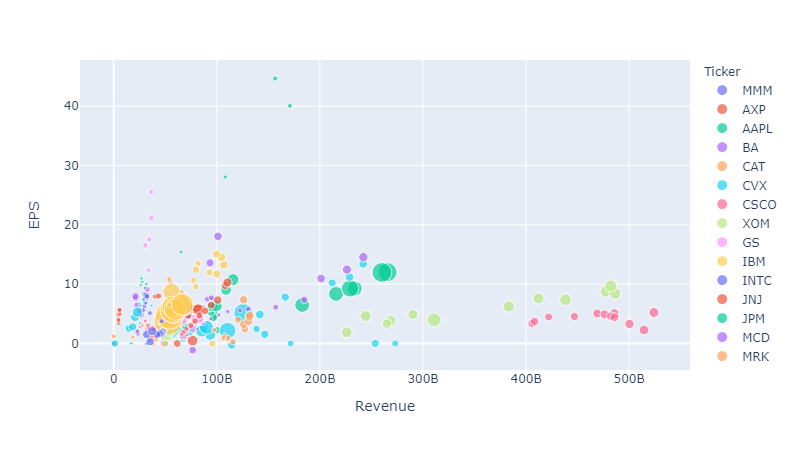

In [19]:
px.scatter(
    plot_df,
    x="Revenue",
    y="EPS",
    size="Market Cap",
    color="Ticker"
)

### Single year MVP

In [230]:
bubble_plot_2018 = plot_df[plot_df['FY']==2018]
bubble_plot_2018

Date    FY Ticker  Stock Price  Stock Price 1st Der  \
10  2018-12-31  2018    MMM       199.27                -0.21   
22  2018-12-31  2018    AXP       102.67                 0.04   
34  2018-09-29  2018   AAPL       212.24                 0.27   
46  2018-12-31  2018     BA       387.72                 0.15   
58  2018-12-31  2018    CAT       130.11                -0.21   
70  2018-12-31  2018    CVX       113.01                -0.10   
82  2018-07-28  2018   CSCO        46.59                 0.48   
94  2018-12-31  2018    XOM        72.29                -0.17   
106 2018-12-31  2018     GS       202.48                -0.25   
118 2018-12-31  2018    IBM       134.38                -0.18   
130 2018-12-29  2018   INTC        46.71                -0.07   
142 2018-12-30  2018    JNJ       131.64                 0.01   
154 2018-12-31  2018    JPM       104.41                -0.09   
166 2018-12-31  2018    MCD       181.77                 0.05   
178 2018-12-31  2018    MRK        73.37                 0.21   
190 2018-06-30  2018   MSFT       105.37                 0.44   
202 2018-05-31  2018    NKE        79.68                 0.35   
214 2018-12-31  2018    PFE        41.58                 0.10   
226 2018-06-30  2018     PG        80.20                -0.11   
238 2018-12-31  2018    RTX      1766.49                -0.02   
250 2018-12-31  2018     KO        47.86                 0.01   
262 2019-02-03  2018     HD       184.00                -0.01   
274 2018-12-31  2018    TRV       125.88                -0.15   
286 2018-12-31  2018    UNH       270.37                 0.14   
298 2018-12-31  2018     VZ        54.00                 0.00   
310 2018-09-30  2018      V       132.76                 0.21   
322 2019-01-31  2018    WMT        97.93                 0.10   

     Stock Price 2nd Der         Revenue  Revenue 1st Der  Revenue 2nd Der  \
10                   nan  32765000000.00             0.04            -0.32   
22                 -0.86  40338000000.00             0.21            -0.96   
34                 -0.35 265595000000.00             0.16             1.52   
46                 -0.86 101127000000.00             0.08              nan   
58                   nan  54722000000.00             0.20             0.13   
70                   nan 166339000000.00             0.17            -0.27   
82                   nan  49330000000.00             0.03              nan   
94                   nan 290212000000.00             0.19             1.32   
106                  nan  36616000000.00             0.14             1.96   
118                 1.58  79591000000.00             0.01              nan   
130                  nan  70848000000.00             0.13             1.27   
142                  nan  81581000000.00             0.07             0.06   
154                  nan 109029000000.00             0.09             1.28   
166                -0.87  21025200000.00            -0.08             0.08   
178                  nan  42294000000.00             0.05             5.84   
190                 0.53 110360000000.00             0.23             3.18   
202                 4.09  36397000000.00             0.06            -0.02   
214                -0.52  53647000000.00             0.02              nan   
226                  nan  66832000000.00             0.03              nan   
238                  nan  66501000000.00             0.11             1.46   
250                -0.93  31856000000.00            -0.10            -0.35   
262                  nan 108203000000.00             0.07             0.08   
274                  nan  30282000000.00             0.05             0.03   
286                -0.69 226247000000.00             0.12             0.41   
298                -0.98 130863000000.00             0.04            88.39   
310                -0.39  20609000000.00             0.12            -0.44   
322                -0.59 514405000000.00             0.03            -0.06   

    

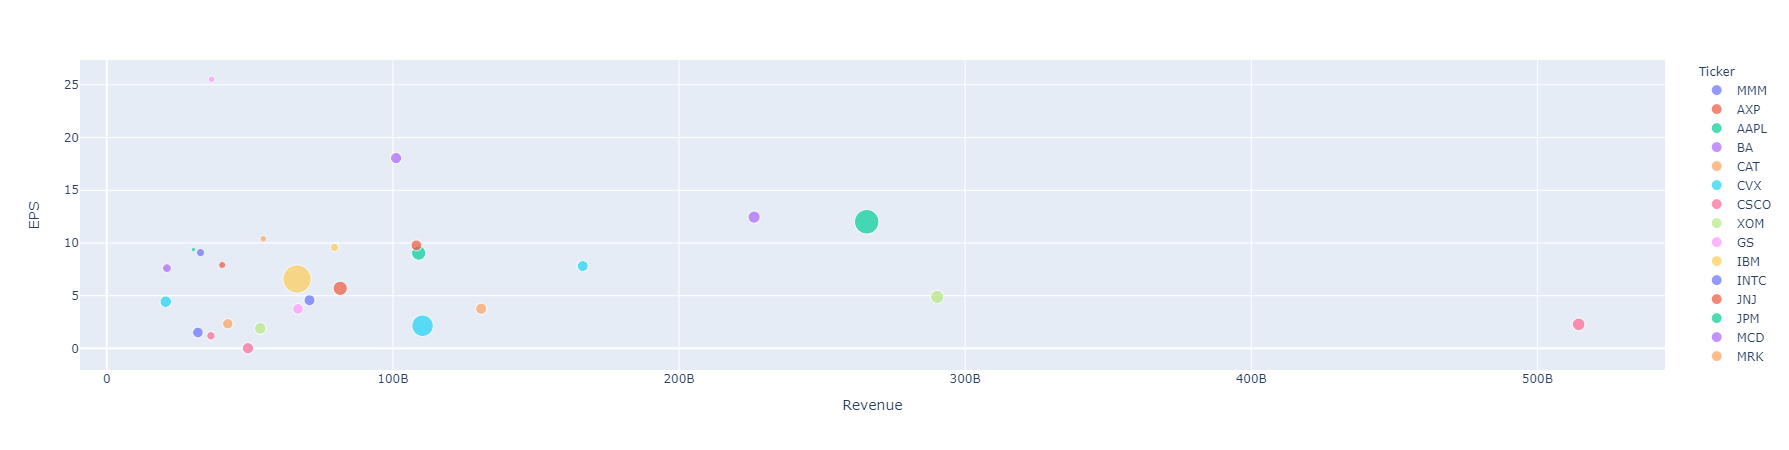

In [231]:
px.scatter(
    bubble_plot_2018,
    x="Revenue",
    y="EPS",
    size="Market Cap",
    color="Ticker"
)

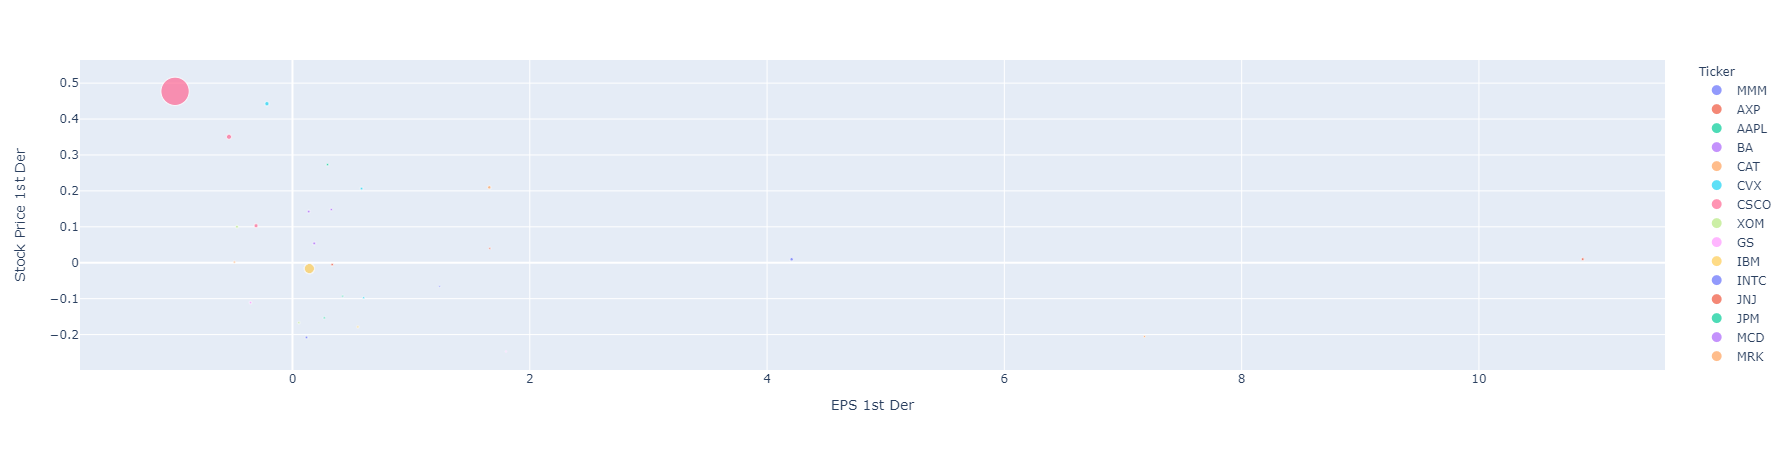

In [232]:
# Earnings vs 1 yr. return (instead of Revenue)
#2018
px.scatter(
    bubble_plot_2018,
    x="EPS 1st Der",
    y="Stock Price 1st Der",
    size="PE",
    color="Ticker"
)
# Make P/S version
# idea color based on positive or negative

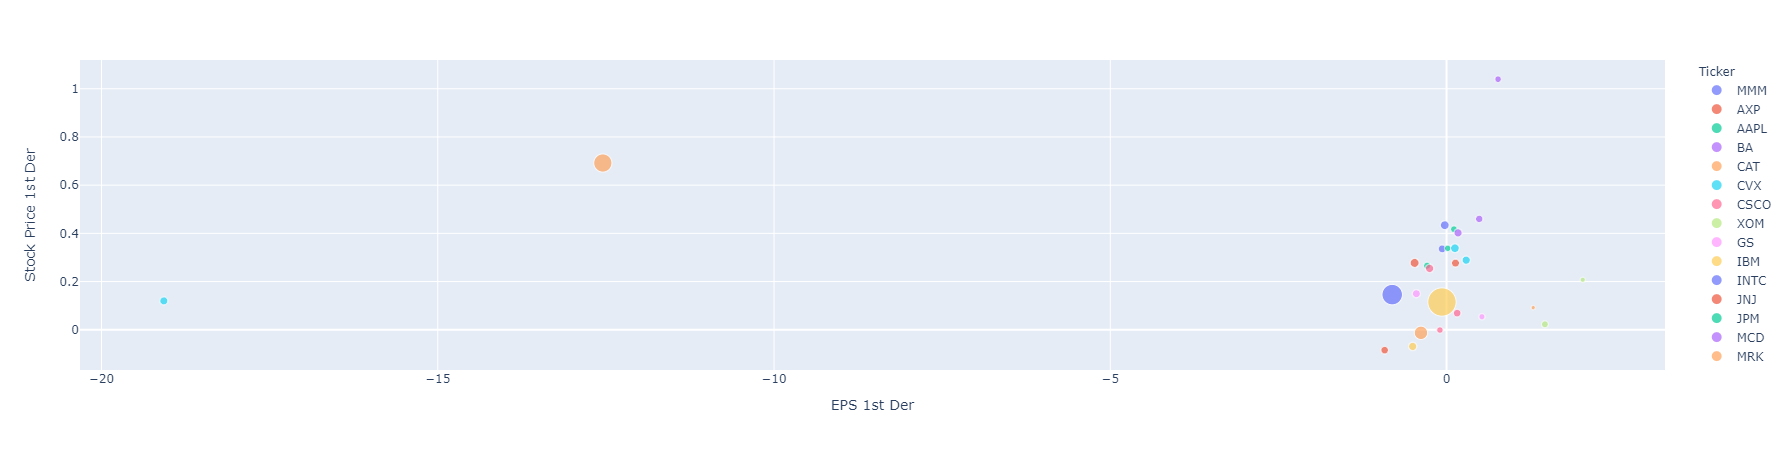

In [229]:
#2017
px.scatter(
    bubble_plot_2017,
    x="EPS 1st Der",
    y="Stock Price 1st Der",
    size="PE",
    color="Ticker"
)

#### 2019 with a negative PE you can't plot PE as a bubble. This creates an issue with universality.

In [226]:
px.scatter(
    bubble_plot_2019,
    x="EPS 1st Der",
    y="Stock Price 1st Der",
    size="PE",
    color="Ticker"
)

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [-47.087537351880464]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

Walmart had the highest revenue and Goldman Sachs had the highest EPS. Did this reflect in Stock Performance for the year 2019? 

Next take into consideration 1st derivative.

UNH and AAPL plot as have the most ideal North Easterly vector. Was this indicative of Stock Performance? Next take into consideration 1st derivative.

In [103]:
plot_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

### Need dates in index for line plot of price all on same chart

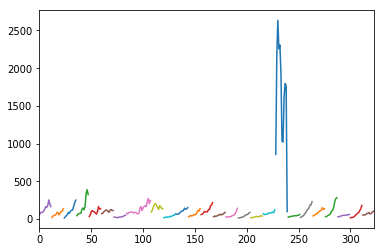

In [104]:
group_by_ticker = plot_df.groupby('Ticker')['Stock Price'].plot()

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



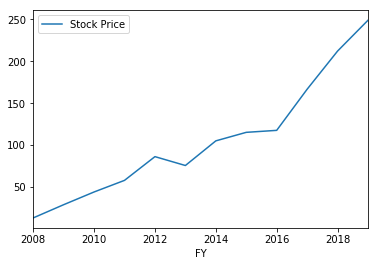

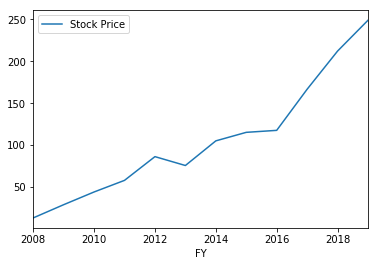

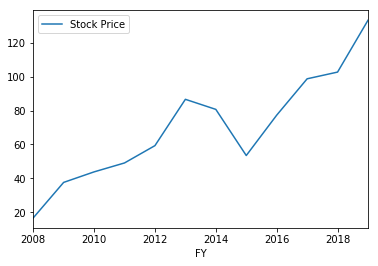

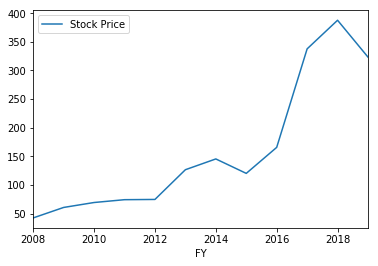

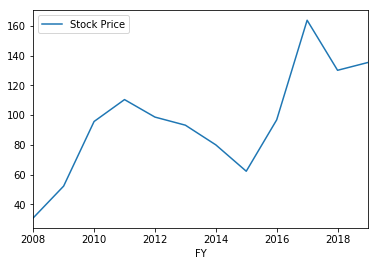

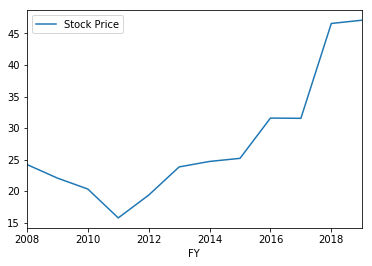

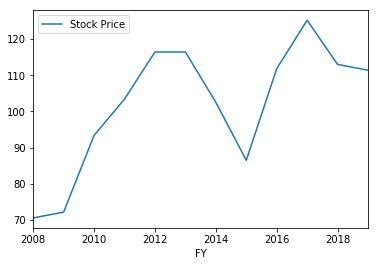

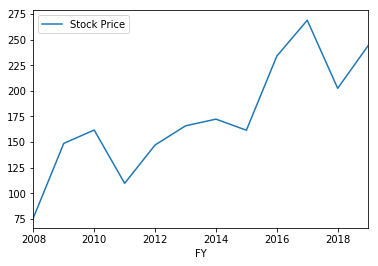

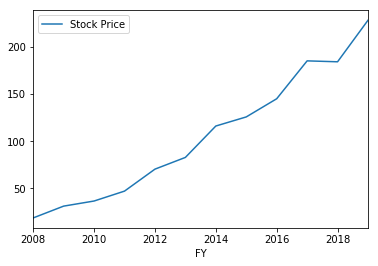

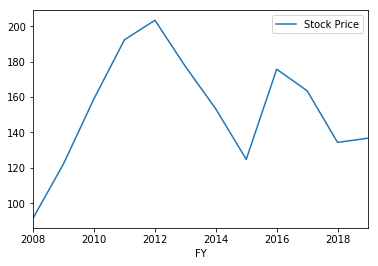

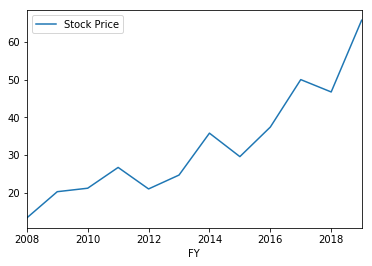

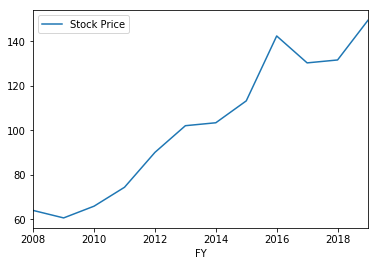

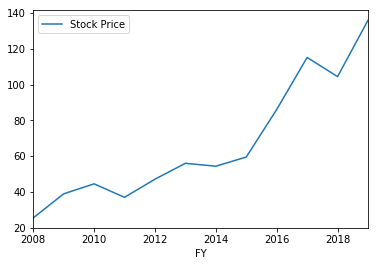

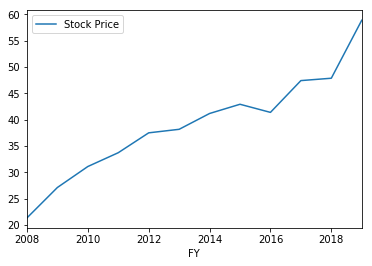

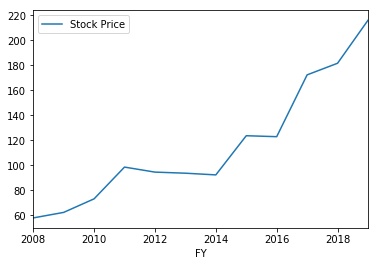

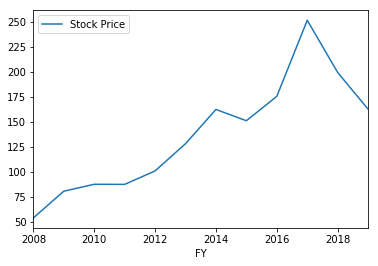

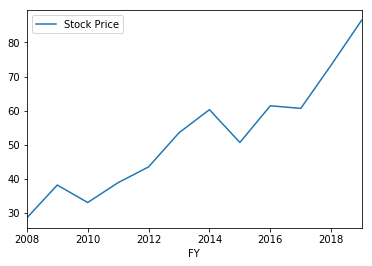

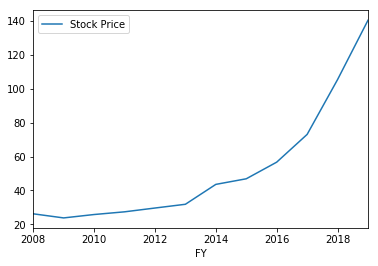

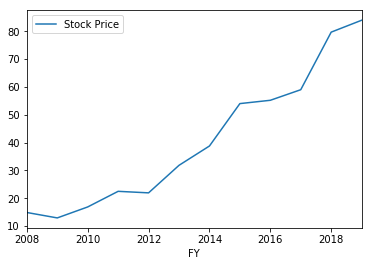

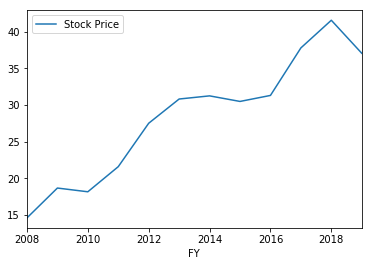

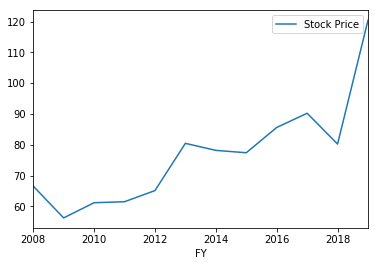

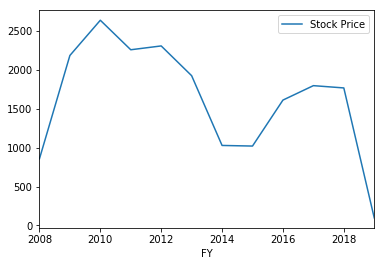

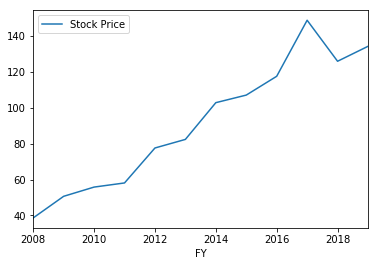

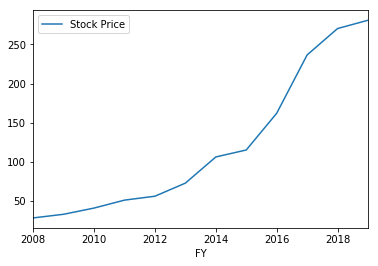

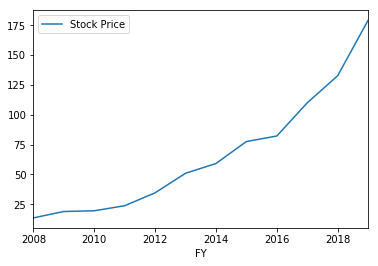

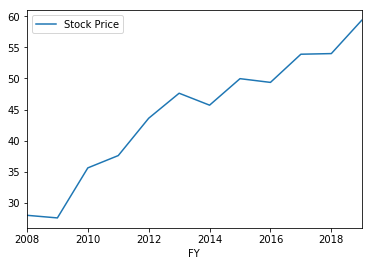

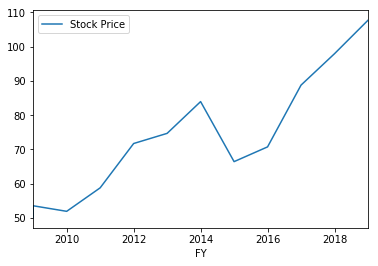

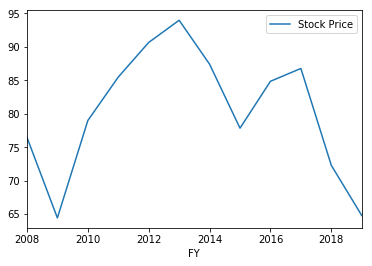

In [105]:
group_by_ticker = plot_df.groupby('Ticker')['FY', 'Stock Price'].plot.line(x='FY')
#group_by_ticker.head()

### Cannot convert FY to datetime index

In [106]:
fy_as_date_index = plot_df.set_index(pd.to_datetime(plot_df['Date'], infer_datetime_format=True))
fy_as_date_index.drop(columns='Date', inplace=True)
fy_as_date_index

FY Ticker  Stock Price  Stock Price 1st Der  \
Date                                                        
2008-12-31  2008    MMM        53.79                  nan   
2009-12-31  2009    MMM        80.49                 0.50   
2010-12-31  2010    MMM        87.44                 0.09   
2011-12-31  2011    MMM        87.34                -0.00   
2012-12-31  2012    MMM       100.80                 0.15   
2013-12-31  2013    MMM       128.05                 0.27   
2014-12-31  2014    MMM       162.30                 0.27   
2015-12-31  2015    MMM       151.00                -0.07   
2016-12-31  2016    MMM       175.42                 0.16   
2017-12-31  2017    MMM       251.54                 0.43   
2018-12-31  2018    MMM       199.27                -0.21   
2019-12-31  2019    MMM       162.51                -0.18   
2008-12-31  2008    AXP        16.73                  nan   
2009-12-31  2009    AXP        37.66                 1.25   
2010-12-31  2010    AXP        43.86                 0.16   
2011-12-31  2011    AXP        49.12                 0.12   
2012-12-31  2012    AXP        59.33                 0.21   
2013-12-31  2013    AXP        86.62                 0.46   
2014-12-31  2014    AXP        80.69                -0.07   
2015-12-31  2015    AXP        53.50                -0.34   
2016-12-31  2016    AXP        77.28                 0.44   
2017-12-31  2017    AXP        98.71                 0.28   
2018-12-31  2018    AXP       102.67                 0.04   
2019-12-31  2019    AXP       133.22                 0.30   
2008-09-27  2008   AAPL        13.16                  nan   
2009-09-26  2009   AAPL        28.93                 1.20   
2010-09-25  2010   AAPL        44.12                 0.53   
2011-09-24  2011   AAPL        57.97                 0.31   
2012-09-29  2012   AAPL        86.29                 0.49   
2013-09-28  2013   AAPL        75.70                -0.12   
2014-09-27  2014   AAPL       105.11                 0.39   
2015-09-26  2015   AAPL       115.28                 0.10   
2016-09-24  2016   AAPL       117.65                 0.02   
2017-09-30  2017   AAPL       166.72                 0.42   
2018-09-29  2018   AAPL       212.24                 0.27   
2019-09-28  2019   AAPL       249.05                 0.17   
2008-12-31  2008     BA        42.31                  nan   
2009-12-31  2009     BA        60.60                 0.43   
2010-12-31  2010     BA        69.23                 0.14   
2011-12-31  2011     BA        74.16                 0.07   
2012-12-31  2012     BA        74.59                 0.01   
2013-12-31  2013     BA       126.53                 0.70   
2014-12-31  2014     BA       145.37                 0.15   
2015-12-31  2015     BA       120.13                -0.17   
2016-12-31  2016     BA       165.57                 0.38   
2017-12-31  2017     BA       337.71                 1.04   
2018-12-31  2018     BA       387.72                 0.15   
2019-12-31  2019     BA       323.30                -0.17   
2008-12-31  2008    CAT        30.85                  nan   
2009-12-31  2009    CAT        52.24                 0.69   
2010-12-31  2010    CAT        95.68                 0.83   
2011-12-31  2011    CAT       110.41                 0.15   
2012-12-31  2012    CAT        98.65                -0.11   
2013-12-31  2013    CAT        93.20                -0.06   
2014-12-31  2014    CAT        79.97                -0.14   
2015-12-31  2015    CAT        62.24                -0.22   
2016-12-31  2016    CAT        96.79                 0.56   
2017-12-31  2017    CAT       163.76                 0.69   
2018-12-31  2018    CAT       130.11                -0.21   
2019-12-31  2019    CAT       135.37                 0.04   
2008-12-31  2008    CVX        70.52                  nan   
2009-12-31  2009    CVX        72.12                 0.02   
2010-12-31  2010    CVX        93.37                 0.29   
2011-12-31  2011    CVX       103.41             

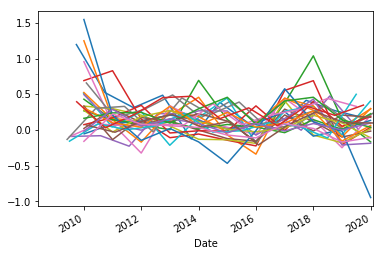

In [107]:
group_by_ticker = fy_as_date_index.groupby('Ticker')['Stock Price 1st Der'].plot()
#group_by_ticker = plot_df.groupby('Ticker')['FY', 'Stock Price'].plot.line(x='Date')

In [110]:
group_by_ticker_hv = fy_as_date_index.groupby('Ticker')['Stock Price 1st Der'].hvplot()

AttributeError: Cannot access callable attribute 'hvplot' of 'SeriesGroupBy' objects, try using the 'apply' method

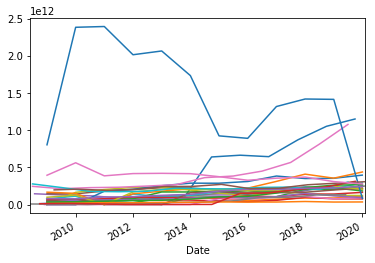

In [108]:
group_by_ticker = fy_as_date_index.groupby('Ticker')['Market Cap'].plot()

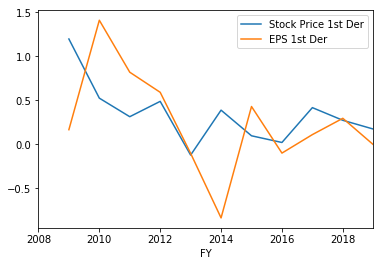

In [215]:
first_der_df = fy_as_date_index.reset_index()
aapl_der_df = first_der_df[first_der_df['Ticker']=='AAPL']
first_der_compare = aapl_der_df[['FY', 'Stock Price 1st Der', 'EPS 1st Der']]
#first_der_compare.head()
first_der_compare.plot(x='FY')

In [234]:
first_der_df = fy_as_date_index.reset_index()
aapl_der_df = first_der_df[first_der_df['Ticker']=='AAPL']
first_der_compare = aapl_der_df[['FY', 'Stock Price 1st Der', 'EPS 1st Der']]
first_der_compare.set_index(first_der_compare['FY'], inplace=True)
#first_der_compare.head()
first_der_compare.hvplot()

# correlation here could be interesting

:NdOverlay   [Variable]
   :Curve   [FY]   (value)

In [235]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    df_costs = df_copy.groupby(['FY', "Ticker"]).last()
    # df_costs.reset_index(inplace=True)
    # df_copy.rename(columns={"level_0": "year"}, inplace=True)
    out_graph = df_costs.hvplot.line(
        "FY",
        "Stock Price 1st Der",
        xlabel="Fiscal Year",
        ylabel="1-year Stock Return",
        groupby="Ticker",
    )
    return out_graph

In [237]:
average_price_by_neighborhood()

:DynamicMap   [Ticker]
   :Curve   [FY]   (Stock Price 1st Der)

#### Add cummulative?

A cummulative calc is needed to plot the trend. This only plots change.

In [217]:
first_der_compare.drop(columns='FY', inplace=True)
first_der_compare

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Stock Price 1st Der  EPS 1st Der
FY                                    
2008                  nan          nan
2009                 1.20         0.17
2010                 0.53         1.41
2011                 0.31         0.82
2012                 0.49         0.59
2013                -0.12        -0.10
2014                 0.39        -0.84
2015                 0.10         0.43
2016                 0.02        -0.10
2017                 0.42         0.11
2018                 0.27         0.30
2019                 0.17        -0.00

In [218]:
first_der_compare_drop08 = first_der_compare.drop(index=2008)
first_der_compare_drop08

Stock Price 1st Der  EPS 1st Der
FY                                    
2009                 1.20         0.17
2010                 0.53         1.41
2011                 0.31         0.82
2012                 0.49         0.59
2013                -0.12        -0.10
2014                 0.39        -0.84
2015                 0.10         0.43
2016                 0.02        -0.10
2017                 0.42         0.11
2018                 0.27         0.30
2019                 0.17        -0.00

In [219]:
cumprod_aapl2 = (1 + first_der_compare_drop08).cumprod()
cumprod_aapl2

Stock Price 1st Der  EPS 1st Der
FY                                    
2009                 2.20         1.17
2010                 3.35         2.81
2011                 4.41         5.12
2012                 6.56         8.15
2013                 5.75         7.30
2014                 7.99         1.18
2015                 8.76         1.69
2016                 8.94         1.52
2017                12.67         1.69
2018                16.13         2.19
2019                18.92         2.18

In [196]:
#first_der_compare = first_der_compare.loc[2009:2019]
# find = first_der_compare.columns.get_loc('EPS 1st Der')
# find

first_der_compare.iloc[0, first_der_compare.columns.get_loc('Stock Price 1st Der')] = 0

first_der_compare.head()
# first_der_compare_cumprod = (1 + first_der_compare).cumprod()
# first_der_compare_cumprod

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Stock Price 1st Der  EPS 1st Der
FY                                    
2008                 0.00         0.00
2009                 1.20         0.17
2010                 0.53         1.41
2011                 0.31         0.82
2012                 0.49         0.59

In [233]:
cumprod_aapl = (1 + first_der_compare).cumprod()-1
cumprod_aapl

Stock Price 1st Der  EPS 1st Der
FY                                    
2008                  nan          nan
2009                 1.20         0.17
2010                 2.35         1.81
2011                 3.41         4.12
2012                 5.56         7.15
2013                 4.75         6.30
2014                 6.99         0.18
2015                 7.76         0.69
2016                 7.94         0.52
2017                11.67         0.69
2018                15.13         1.19
2019                17.92         1.18

In [211]:
first_der_compare_drop08 = first_der_compare.drop(index=2008)
first_der_compare_drop08

Stock Price 1st Der  EPS 1st Der
FY                                    
2009                 1.20         0.17
2010                 0.53         1.41
2011                 0.31         0.82
2012                 0.49         0.59
2013                -0.12        -0.10
2014                 0.39        -0.84
2015                 0.10         0.43
2016                 0.02        -0.10
2017                 0.42         0.11
2018                 0.27         0.30
2019                 0.17        -0.00

In [210]:
#first_der_compare_drop08
cumprod_aapl2 = (1 + first_der_compare_drop08).cumprod()
cumprod_aapl2

Stock Price 1st Der  EPS 1st Der
FY                                    
2009                 2.20         1.17
2010                 3.35         2.81
2011                 4.41         5.12
2012                 6.56         8.15
2013                 5.75         7.30
2014                 7.99         1.18
2015                 8.76         1.69
2016                 8.94         1.52
2017                12.67         1.69
2018                16.13         2.19
2019                18.92         2.18

In [212]:
cumprod_aapl2_noplus1 = first_der_compare_drop08.cumprod()
cumprod_aapl2_noplus1

Stock Price 1st Der  EPS 1st Der
FY                                    
2009                 1.20         0.17
2010                 0.63         0.23
2011                 0.20         0.19
2012                 0.10         0.11
2013                -0.01        -0.01
2014                -0.00         0.01
2015                -0.00         0.00
2016                -0.00        -0.00
2017                -0.00        -0.00
2018                -0.00        -0.00
2019                -0.00         0.00

In [46]:
cumm_perf_plot = fy_as_date_index[['Stock Price 1st Der']]
cumm_perf_plot

Stock Price 1st Der
Date                           
2008-12-31                  nan
2009-12-31                 0.50
2010-12-31                 0.09
2011-12-31                -0.00
2012-12-31                 0.15
2013-12-31                 0.27
2014-12-31                 0.27
2015-12-31                -0.07
2016-12-31                 0.16
2017-12-31                 0.43
2018-12-31                -0.21
2019-12-31                -0.18
2008-12-31                  nan
2009-12-31                 1.25
2010-12-31                 0.16
2011-12-31                 0.12
2012-12-31                 0.21
2013-12-31                 0.46
2014-12-31                -0.07
2015-12-31                -0.34
2016-12-31                 0.44
2017-12-31                 0.28
2018-12-31                 0.04
2019-12-31                 0.30
2008-09-27                  nan
2009-09-26                 1.20
2010-09-25                 0.53
2011-09-24                 0.31
2012-09-29                 0.49
2013-09-28                -0.12
2014-09-27                 0.39
2015-09-26                 0.10
2016-09-24                 0.02
2017-09-30                 0.42
2018-09-29                 0.27
2019-09-28                 0.17
2008-12-31                  nan
2009-12-31                 0.43
2010-12-31                 0.14
2011-12-31                 0.07
2012-12-31                 0.01
2013-12-31                 0.70
2014-12-31                 0.15
2015-12-31                -0.17
2016-12-31                 0.38
2017-12-31                 1.04
2018-12-31                 0.15
2019-12-31                -0.17
2008-12-31                  nan
2009-12-31                 0.69
2010-12-31                 0.83
2011-12-31                 0.15
2012-12-31                -0.11
2013-12-31                -0.06
2014-12-31                -0.14
2015-12-31                -0.22
2016-12-31                 0.56
2017-12-31                 0.69
2018-12-31                -0.21
2019-12-31                 0.04
2008-12-31                  nan
2009-12-31                 0.02
2010-12-31                 0.29
2011-12-31                 0.11
2012-12-31                 0.13
2013-12-31                 0.00
2014-12-31                -0.12
2015-12-31                -0.16
2016-12-31                 0.29
2017-12-31                 0.12
2018-12-31                -0.10
2019-12-31                -0.01
2008-07-26                  nan
2009-07-25                -0.09
2010-07-31                -0.08
2011-07-30                -0.23
2012-07-28                 0.23
2013-07-27                 0.23
2014-07-26                 0.04
2015-07-25                 0.02
2016-07-30                 0.25
2017-07-29                -0.00
2018-07-28                 0.48
2019-07-27                 0.01
2008-12-31                  nan
2009-12-31                -0.16
2010-12-31                 0.23
2011-12-31                 0.08
2012-12-31                 0.06
2013-12-31                 0.04
2014-12-31                -0.07
2015-12-31                -0.11
2016-12-31                 0.09
2017-12-31                 0.02
2018-12-31                -0.17
2019-12-31                -0.10
2008-11-28                  nan
2009-12-31                 0.96
2010-12-31                 0.09
2011-12-31                -0.32
2012-12-31                 0.34
2013-12-31                 0.13
2014-12-31                 0.04
2015-12-31                -0.06
2016-12-31                 0.45
2017-12-31                 0.15
2018-12-31                -0.25
2019-12-31                 0.21
2008-12-31                  nan
2009-12-31                 0.34
2010-12-31                 0.30
2011-12-31                 0.21
2012-12-31                 0.06
2013-12-31                -0.13
2014-12-31                -0.14
2015-12-31                -0.19
2016-12-31                 0.41
2017-12-31                -0.07
2018-12-31                -0.18
2019-12-31                 0.02
2008-12-27                  nan
2009-12-26                 0.52
2010-12-25                 0.05
2011-12-31  

In [47]:
group_by_tick = cumm_perf_plot.groupby('Ticker')['Stock Price 1st Der']
group_by_tick

KeyError: 'Ticker'

In [50]:
cumm_group_by_ticker = (1 + cumm_perf_plot).cumprod()
cumm_group_by_ticker

Stock Price 1st Der
Date                           
2008-12-31                  nan
2009-12-31                 1.50
2010-12-31                 1.63
2011-12-31                 1.62
2012-12-31                 1.87
2013-12-31                 2.38
2014-12-31                 3.02
2015-12-31                 2.81
2016-12-31                 3.26
2017-12-31                 4.68
2018-12-31                 3.70
2019-12-31                 3.02
2008-12-31                  nan
2009-12-31                 6.80
2010-12-31                 7.92
2011-12-31                 8.87
2012-12-31                10.71
2013-12-31                15.64
2014-12-31                14.57
2015-12-31                 9.66
2016-12-31                13.96
2017-12-31                17.83
2018-12-31                18.54
2019-12-31                24.06
2008-09-27                  nan
2009-09-26                52.89
2010-09-25                80.66
2011-09-24               105.97
2012-09-29               157.75
2013-09-28               138.39
2014-09-27               192.15
2015-09-26               210.74
2016-09-24               215.07
2017-09-30               304.78
2018-09-29               387.99
2019-09-28               455.28
2008-12-31                  nan
2009-12-31               652.10
2010-12-31               744.96
2011-12-31               798.01
2012-12-31               802.64
2013-12-31              1361.55
2014-12-31              1564.28
2015-12-31              1292.68
2016-12-31              1781.65
2017-12-31              3633.99
2018-12-31              4172.13
2019-12-31              3478.93
2008-12-31                  nan
2009-12-31              5891.06
2010-12-31             10789.75
2011-12-31             12450.84
2012-12-31             11124.67
2013-12-31             10510.08
2014-12-31              9018.15
2015-12-31              7018.75
2016-12-31             10914.92
2017-12-31             18467.07
2018-12-31             14672.39
2019-12-31             15265.56
2008-12-31                  nan
2009-12-31             15611.91
2010-12-31             20211.93
2011-12-31             22385.30
2012-12-31             25208.08
2013-12-31             25208.08
2014-12-31             22194.80
2015-12-31             18718.27
2016-12-31             24205.82
2017-12-31             27108.70
2018-12-31             24463.42
2019-12-31             24114.90
2008-07-26                  nan
2009-07-25             21973.35
2010-07-31             20240.18
2011-07-30             15678.17
2012-07-28             19283.95
2013-07-27             23736.40
2014-07-26             24602.98
2015-07-25             25091.05
2016-07-30             31455.95
2017-07-29             31416.11
2018-07-28             46406.99
2019-07-27             46914.99
2008-12-31                  nan
2009-12-31             39523.18
2010-12-31             48454.70
2011-12-31             52441.98
2012-12-31             55619.54
2013-12-31             57656.12
2014-12-31             53625.90
2015-12-31             47755.39
2016-12-31             52055.52
2017-12-31             53233.30
2018-12-31             44344.73
2019-12-31             39744.01
2008-11-28                  nan
2009-12-31             77803.47
2010-12-31             84630.63
2011-12-31             57405.70
2012-12-31             76982.12
2013-12-31             86759.87
2014-12-31             90196.99
2015-12-31             84520.77
2016-12-31            122365.74
2017-12-31            140697.06
2018-12-31            105928.24
2019-12-31            127717.60
2008-12-31                  nan
2009-12-31            170554.91
2010-12-31            221864.92
2011-12-31            268255.74
2012-12-31            283612.51
2013-12-31            247157.60
2014-12-31            213643.05
2015-12-31            173899.40
2016-12-31            244983.68
2017-12-31            228010.41
2018-12-31            187263.41
2019-12-31            190593.96
2008-12-27                  nan
2009-12-26            289452.12
2010-12-25            302557.23
2011-12-31  

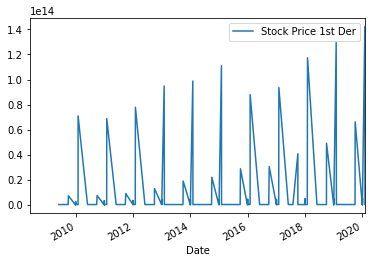

In [49]:
cumm_group_by_ticker.plot()

## Amrita looks at Column Correlations:

## Marshall creates Interactive Bubble Plot:

## David identifies limitations of data for plotting and filtering options: